## Final Assignment: explore the neighborhoods

### Part 1: Creating Moscow metro initial pandas dataframe

#### Import main libraries

In [1]:
import numpy as np 
import pandas as pd 

#### Run http GET request to get the necessary wikipedia page table content scraping it using BeautifulSoup library

In [2]:
import requests
from bs4 import BeautifulSoup
from lxml import html

res = requests.get("https://en.wikipedia.org/wiki/List_of_Moscow_Metro_stations")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[1] 
df = pd.read_html(str(table))[0]

df.head()

,L,English transcription,Russian Cyrillic,Transfer,Opened,Elev.,Type,Coordinates,Pic.
0,NaN,Bulvar Rokossovskogo,Бульвар Рокоссовского,<>,1990-08-01,−8 m,"column, triple-span",55°48′53″N 37°44′03″E﻿ / ﻿55.8148°N 37.7342°E,NaN
1,NaN,Cherkizovskaya,Черкизовская,{},1990-08-01,−9 m,"single-vault, shallow",55°48′14″N 37°44′41″E﻿ / ﻿55.8038°N 37.7448°E,NaN
2,NaN,Preobrazhenskaya Ploshchad,Преображенская площадь,NaN,1965-12-31,−8 m,"column, triple-span",55°47′47″N 37°42′54″E﻿ / ﻿55.7963°N 37.7151°E,NaN
3,NaN,Sokolniki,Сокольники,NaN,1935-05-15,−9 m,"column, triple-span",55°47′20″N 37°40′49″E﻿ / ﻿55.7888°N 37.6802°E,NaN
4,NaN,Krasnoselskaya,Красносельская,NaN,1935-05-15,−8 m,"column, double-span",55°46′48″N 37°40′02″E﻿ / ﻿55.7801°N 37.6673°E,NaN


In [3]:
df.shape

(261, 9)

#### Check the structure of the Coordinates attribute string to see how it can be parsed

In [4]:
df.Coordinates[2]

'55°47′47″N 37°42′54″E\ufeff / \ufeff55.7963°N 37.7151°E'

#### Drop all unnecessary columns to get cleaner DataFrame

In [5]:
df.drop(['L','Transfer','Opened','Elev.','Type','Pic.'], axis=1, inplace=True)
df.head()

,English transcription,Russian Cyrillic,Coordinates
0,Bulvar Rokossovskogo,Бульвар Рокоссовского,55°48′53″N 37°44′03″E﻿ / ﻿55.8148°N 37.7342°E
1,Cherkizovskaya,Черкизовская,55°48′14″N 37°44′41″E﻿ / ﻿55.8038°N 37.7448°E
2,Preobrazhenskaya Ploshchad,Преображенская площадь,55°47′47″N 37°42′54″E﻿ / ﻿55.7963°N 37.7151°E
3,Sokolniki,Сокольники,55°47′20″N 37°40′49″E﻿ / ﻿55.7888°N 37.6802°E
4,Krasnoselskaya,Красносельская,55°46′48″N 37°40′02″E﻿ / ﻿55.7801°N 37.6673°E


#### Use str.split() and str.replace() methods to get Coordinates column to the correct 'Latitude,Longitude' format

In [6]:
df.Coordinates = df.Coordinates.str.split('/').str[1].str.replace(' \ufeff','').str.replace('N','').str.replace('E','').str.replace('°','').str.replace(' ',',')

df.head()

,English transcription,Russian Cyrillic,Coordinates
0,Bulvar Rokossovskogo,Бульвар Рокоссовского,"55.8148,37.7342"
1,Cherkizovskaya,Черкизовская,"55.8038,37.7448"
2,Preobrazhenskaya Ploshchad,Преображенская площадь,"55.7963,37.7151"
3,Sokolniki,Сокольники,"55.7888,37.6802"
4,Krasnoselskaya,Красносельская,"55.7801,37.6673"


####  Replace column names for easier management and understanding

In [7]:
df = df.rename(columns={'English transcription': 'MetroStation', 'Russian Cyrillic': 'RussianName'})
df.head()

,MetroStation,RussianName,Coordinates
0,Bulvar Rokossovskogo,Бульвар Рокоссовского,"55.8148,37.7342"
1,Cherkizovskaya,Черкизовская,"55.8038,37.7448"
2,Preobrazhenskaya Ploshchad,Преображенская площадь,"55.7963,37.7151"
3,Sokolniki,Сокольники,"55.7888,37.6802"
4,Krasnoselskaya,Красносельская,"55.7801,37.6673"


#### Check resulting DataFrame shape: we have 261 metro stations

In [8]:
df.shape

(261, 3)

#### Use str.split(',').str to create separate Latitude and Longitude columns with corresponding values

In [9]:
df['Latitude'] = df.Coordinates.str.split(',').str[0]
df['Longitude'] = df.Coordinates.str.split(',').str[1]
df.head()

,MetroStation,RussianName,Coordinates,Latitude,Longitude
0,Bulvar Rokossovskogo,Бульвар Рокоссовского,"55.8148,37.7342",55.8148,37.7342
1,Cherkizovskaya,Черкизовская,"55.8038,37.7448",55.8038,37.7448
2,Preobrazhenskaya Ploshchad,Преображенская площадь,"55.7963,37.7151",55.7963,37.7151
3,Sokolniki,Сокольники,"55.7888,37.6802",55.7888,37.6802
4,Krasnoselskaya,Красносельская,"55.7801,37.6673",55.7801,37.6673


#### Check for columns data types and convert Latitude and Longitude to float

In [10]:
df.dtypes

MetroStation    object
RussianName     object
Coordinates     object
Latitude        object
Longitude       object
dtype: object

In [11]:
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)
df.dtypes

MetroStation     object
RussianName      object
Coordinates      object
Latitude        float64
Longitude       float64
dtype: object

#### Drop now redundant Coordinates column

In [12]:
df.drop(['Coordinates'], axis=1, inplace=True)
df.head()

,MetroStation,RussianName,Latitude,Longitude
0,Bulvar Rokossovskogo,Бульвар Рокоссовского,55.8148,37.7342
1,Cherkizovskaya,Черкизовская,55.8038,37.7448
2,Preobrazhenskaya Ploshchad,Преображенская площадь,55.7963,37.7151
3,Sokolniki,Сокольники,55.7888,37.6802
4,Krasnoselskaya,Красносельская,55.7801,37.6673


### Part 2: Getting metro stations on the map

####  Install all the necessary libraries for folium maps and geocoders

In [13]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.21.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

#### Get map initial coordinates for Moscow City

In [14]:
address = 'Moscow City'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Moscow are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Moscow are 55.7628614, 37.6532293.


#### Run first test folium map to overlay all Moscow metro stations with corresponding latitude, longitude and check accuracy

In [15]:
moscow_metro_df = df
# create map of Moscow using latitude and longitude values
map_moscow = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, metro, runame in zip(moscow_metro_df['Latitude'], moscow_metro_df['Longitude'], moscow_metro_df['MetroStation'], moscow_metro_df['RussianName']):
    label = '{}, {}'.format(metro, runame) # .encode('cp1251')  a.encode('utf-8')
    label = folium.Popup(label, parse_html=True )
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_moscow)  
    
map_moscow

### Part 3: Getting Foursquare data

#### Set your CLIENT_ID and CLIENT_SECRET

In [16]:
import json 
CLIENT_ID = 'ZJCT50EWFMTCM3TSVAYHDAYXOGVNS02K4TKMRSQU0KYR3H3J' # your Foursquare ID
CLIENT_SECRET = 'IJYTOLLXK52CLXWNYX0FGXYRKHEADO4TEL2N4Z1JUVUE0T00' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500

#### Get unique list of venue types and their assosiated code via Foursquare API GET

In [17]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
category_results = requests.get(url).json()

category_list = category_results['response']['categories']
for data in category_list:
    print(data['id'], data['name'])

4d4b7104d754a06370d81259 Arts & Entertainment
4d4b7105d754a06372d81259 College & University
4d4b7105d754a06373d81259 Event
4d4b7105d754a06374d81259 Food
4d4b7105d754a06376d81259 Nightlife Spot
4d4b7105d754a06377d81259 Outdoors & Recreation
4d4b7105d754a06375d81259 Professional & Other Places
4e67e38e036454776db1fb3a Residence
4d4b7105d754a06378d81259 Shop & Service
4d4b7105d754a06379d81259 Travel & Transport


#### Get a dictionary with all Food venues categories

In [18]:
# function to flatten a 'parent_id' category, returns all categories if checkParentID = False
def flatten_Hierarchy(category_list, checkParentID, category_dict, parent_id = ''):
    for data in category_list:
        
        if checkParentID == True and data['id'] == parent_id:
            category_dict[data['id']] = data['name']
            flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
        
        elif checkParentID == False:
            category_dict[data['id']] = data['name']
            if len(data['categories']) != 0:
                flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
    
    return category_dict

In [19]:
# this function takes the parent ID and returns 'name' and 'id' of all the sub-categories
category_dict = flatten_Hierarchy(category_list, checkParentID=True, category_dict = {}, parent_id = '4d4b7105d754a06374d81259')

In [20]:
category_dict

{'4d4b7105d754a06374d81259': 'Food',
 '503288ae91d4c4b30a586d67': 'Afghan Restaurant',
 '4bf58dd8d48988d1c8941735': 'African Restaurant',
 '4bf58dd8d48988d10a941735': 'Ethiopian Restaurant',
 '4bf58dd8d48988d14e941735': 'American Restaurant',
 '4bf58dd8d48988d157941735': 'New American Restaurant',
 '4bf58dd8d48988d142941735': 'Asian Restaurant',
 '56aa371be4b08b9a8d573568': 'Burmese Restaurant',
 '52e81612bcbc57f1066b7a03': 'Cambodian Restaurant',
 '4bf58dd8d48988d145941735': 'Chinese Restaurant',
 '52af3a5e3cf9994f4e043bea': 'Anhui Restaurant',
 '52af3a723cf9994f4e043bec': 'Beijing Restaurant',
 '52af3a7c3cf9994f4e043bed': 'Cantonese Restaurant',
 '58daa1558bbb0b01f18ec1d3': 'Cha Chaan Teng',
 '52af3a673cf9994f4e043beb': 'Chinese Aristocrat Restaurant',
 '52af3a903cf9994f4e043bee': 'Chinese Breakfast Place',
 '4bf58dd8d48988d1f5931735': 'Dim Sum Restaurant',
 '52af3a9f3cf9994f4e043bef': 'Dongbei Restaurant',
 '52af3aaa3cf9994f4e043bf0': 'Fujian Restaurant',
 '52af3ab53cf9994f4e043bf1'

#### Test one metro station to get all food venues via Foursquare API GET to see where all attributes are

In [21]:
#LIMIT = 1 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
categoryId = '4d4b7105d754a06374d81259' # category ID for "Food"

# create URL

url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    moscow_metro_df[moscow_metro_df.MetroStation == 'Lubyanka'].Latitude.values[0], 
    moscow_metro_df[moscow_metro_df.MetroStation == 'Lubyanka'].Longitude.values[0], 
    radius,
    categoryId,
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/search?&client_id=ZJCT50EWFMTCM3TSVAYHDAYXOGVNS02K4TKMRSQU0KYR3H3J&client_secret=IJYTOLLXK52CLXWNYX0FGXYRKHEADO4TEL2N4Z1JUVUE0T00&v=20180605&ll=55.7597,37.6272&radius=500&categoryId=4d4b7105d754a06374d81259&limit=100'

In [22]:
results = requests.get(url).json()
results['response']['venues']

[{'id': '51c95177498e5bcdfdf35ed7',
  'name': 'Coffeemania (Кофемания)',
  'location': {'address': 'Малый Черкасский пер., 2',
   'crossStreet': 'Лубянская пл.',
   'lat': 55.75861612645536,
   'lng': 37.62650549411774,
   'labeledLatLngs': [{'label': 'display',
     'lat': 55.75861612645536,
     'lng': 37.62650549411774}],
   'distance': 128,
   'postalCode': '109012',
   'cc': 'RU',
   'neighborhood': 'Китай-город',
   'city': 'Москва',
   'state': 'Москва',
   'country': 'Россия',
   'formattedAddress': ['Малый Черкасский пер., 2 (Лубянская пл.)',
    '109012, Москва',
    'Россия']},
  'categories': [{'id': '4bf58dd8d48988d1e0931735',
    'name': 'Coffee Shop',
    'pluralName': 'Coffee Shops',
    'shortName': 'Coffee Shop',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1582285530',
  'hasPerk': False},
 {'id': '5530f6df498e91f7850a14b9',
  'name': 'FARШ',
  'location': {'address

In [23]:
categoryId_list = []
for key, value in category_dict.items():
    categoryId_list.append(key)
categoryId = ','.join(categoryId_list)

#### This function will loop over all the metro stations GET JSON of all food venues in each metro station and then flatten them to pandas DataFrame

In [24]:
def getNearbyFood(names, latitudes, longitudes, radius=500, LIMIT=500):
    not_found = 0
    print('***Start ', end='')
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(' .', end='')
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            "4d4b7105d754a06374d81259", # "Food" category id
            LIMIT)
            
        try:
            # make the GET request
            results = requests.get(url).json()['response']['venues']
            
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng'],  
                v['categories'][0]['name']) for v in results])
        except:
            not_found += 1


    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    print("\nDone*** with {} venues with incompelete information.".format(not_found))
    return(nearby_venues)

In [25]:
import pickle # to serialize and deserialize a Python object structure
try:
    with open('mos_food_venues.pkl', 'rb') as f:
        mos_venues = pickle.load(f)
    print("---Dataframe Existed and Deserialized---")
except:
    mos_venues = getNearbyFood(names=moscow_metro_df['MetroStation'],
                                        latitudes=moscow_metro_df['Latitude'],
                                        longitudes=moscow_metro_df['Longitude']
                                       )
    with open('mos_food_venues.pkl', 'wb') as f:
        pickle.dump(mos_venues, f)
    print("---Dataframe Created and Serialized---")

***Start  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Done*** with 0 venues with incompelete information.
---Dataframe Created and Serialized---


#### This is a preliminary merged DataFrame made with getNearbyFood() that contains all metro stations with corresponding Latitude,Longitude  and all Food Venues per each metro station

In [26]:
print(mos_venues.shape)
mos_venues.head()

(10684, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bulvar Rokossovskogo,55.8148,37.7342,Burger King,55.814026,37.733659,Fast Food Restaurant
1,Bulvar Rokossovskogo,55.8148,37.7342,Broker Coffee,55.813895,37.733526,Coffee Shop
2,Bulvar Rokossovskogo,55.8148,37.7342,шаурма,55.816166,37.730582,Shawarma Place
3,Bulvar Rokossovskogo,55.8148,37.7342,"Китайская Кухня ""Лотос""",55.813580,37.732730,Chinese Restaurant
4,Bulvar Rokossovskogo,55.8148,37.7342,Подсолнухи Art&Food,55.816065,37.736457,Food Court


#### Print uniques categories of Food Venues and sort by venue counts

In [27]:
print('There are {} uniques categories.'.format(len(mos_venues['Venue Category'].unique())))
#pd.DataFrame(mos_venues.groupby('Venue Category')['Venue Category'].count().sort_values(ascending=False))

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(pd.DataFrame(mos_venues.groupby('Venue Category')['Venue Category'].count().sort_values(ascending=False)))

There are 157 uniques categories.
                                          Venue Category
Venue Category                                          
Coffee Shop                                         1478
Café                                                1024
Bakery                                               600
Fast Food Restaurant                                 560
Restaurant                                           492
Cafeteria                                            400
Pizza Place                                          336
Sushi Restaurant                                     304
Caucasian Restaurant                                 284
Italian Restaurant                                   283
Shawarma Place                                       245
Burger Joint                                         226
Asian Restaurant                                     179
Gastropub                                            178
Middle Eastern Restaurant                            1

#### Create new DataFrame that contains only food venues with Restaurant substring in them. This is to remove all food venues which are not restaurants 

In [28]:
venues_df = pd.DataFrame(mos_venues.groupby('Venue Category')['Venue Category'].count().sort_values(ascending=False))

venues_df.index.names = ['Ind']
venues_df.reset_index(inplace = True) 
venues_df = venues_df.rename(columns={'Venue Category': 'Counts', 'Ind': 'VenueCategory'})

In [29]:
restaurants_df = venues_df[venues_df['VenueCategory'].str.contains('Restaurant')]
restaurants_df

,VenueCategory,Counts
3,Fast Food Restaurant,560
4,Restaurant,492
7,Sushi Restaurant,304
8,Caucasian Restaurant,284
9,Italian Restaurant,283
12,Asian Restaurant,179
14,Middle Eastern Restaurant,177
15,Eastern European Restaurant,173
19,Vietnamese Restaurant,138
20,Japanese Restaurant,135


#### Futher exclude some food venues to leave only venues with clear ethnic/nationality status

In [30]:
excl = ['Fast Food Restaurant' , 
        'Restaurant',
        'Seafood Restaurant',
        'Vegetarian / Vegan Restaurant',
        'Comfort Food Restaurant',
        'Theme Restaurant',
        'Molecular Gastronomy Restaurant']
restaurants_clean_df = restaurants_df[~restaurants_df['VenueCategory'].isin(excl)]
restaurants_clean_df

,VenueCategory,Counts
7,Sushi Restaurant,304
8,Caucasian Restaurant,284
9,Italian Restaurant,283
12,Asian Restaurant,179
14,Middle Eastern Restaurant,177
15,Eastern European Restaurant,173
19,Vietnamese Restaurant,138
20,Japanese Restaurant,135
31,Chinese Restaurant,81
33,Russian Restaurant,73


#### Now we have 54 clear national speciality restaurants

In [31]:
restaurants_clean_df.shape

(53, 2)

#### Create list of unique categories from the previous df

In [32]:
# list all the categories
unique_categories = restaurants_clean_df['VenueCategory'].unique().tolist()
print(', '.join(str(x) for x in unique_categories))

Sushi Restaurant, Caucasian Restaurant, Italian Restaurant, Asian Restaurant, Middle Eastern Restaurant, Eastern European Restaurant, Vietnamese Restaurant, Japanese Restaurant, Chinese Restaurant, Russian Restaurant, Modern European Restaurant, Dumpling Restaurant, Belgian Restaurant, Turkish Restaurant, American Restaurant, French Restaurant, Doner Restaurant, Greek Restaurant, Indian Restaurant, Czech Restaurant, Mexican Restaurant, Mediterranean Restaurant, Halal Restaurant, Ukrainian Restaurant, German Restaurant, Ramen Restaurant, Korean Restaurant, Falafel Restaurant, Jewish Restaurant, Udon Restaurant, Thai Restaurant, Lebanese Restaurant, Kebab Restaurant, Israeli Restaurant, Latin American Restaurant, Kosher Restaurant, Spanish Restaurant, Scandinavian Restaurant, Brazilian Restaurant, Cantonese Restaurant, Moroccan Restaurant, Argentinian Restaurant, Dim Sum Restaurant, English Restaurant, Tex-Mex Restaurant, New American Restaurant, Swiss Restaurant, Mongolian Restaurant, H

In [33]:
len(unique_categories)

53

#### Create new DataFrame from intermidiate mos_venues which will only contain the 53 clear national speciality restaurants

In [34]:
mos_venues_per_metro_st = mos_venues[mos_venues['Venue Category'].isin(unique_categories)].reset_index()
mos_venues_per_metro_st.head(100)

,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,3,Bulvar Rokossovskogo,55.8148,37.7342,"Китайская Кухня ""Лотос""",55.813580,37.732730,Chinese Restaurant
1,5,Bulvar Rokossovskogo,55.8148,37.7342,Фо & Ролл,55.815955,37.736421,Vietnamese Restaurant
2,7,Bulvar Rokossovskogo,55.8148,37.7342,Суши Wok,55.814660,37.731430,Asian Restaurant
3,11,Bulvar Rokossovskogo,55.8148,37.7342,СушиStore,55.814618,37.730911,Sushi Restaurant
4,12,Bulvar Rokossovskogo,55.8148,37.7342,El Taco,55.815503,37.737244,Tex-Mex Restaurant
5,16,Bulvar Rokossovskogo,55.8148,37.7342,Indiana,55.816018,37.736614,Indian Restaurant
6,20,Bulvar Rokossovskogo,55.8148,37.7342,Churros House,55.816125,37.736488,Mexican Restaurant
7,25,Bulvar Rokossovskogo,55.8148,37.7342,академия плова,55.816015,37.736523,Asian Restaurant
8,26,Bulvar Rokossovskogo,55.8148,37.7342,"Хинкальная ""Михалыча"" (у ТЦ ""Подсолнухи"")",55.815922,37.735563,Caucasian Restaurant
9,28,Bulvar Rokossovskogo,55.8148,37.7342,Ksusha Kitchen,55.816019,37.736674,Italian Restaurant


In [35]:
print('There are {} unique FOOD categories.'.format(len(mos_venues_per_metro_st['Venue Category'].unique())))

There are 53 unique FOOD categories.


#### Test new DataFrame with a single metro station to see a list of ethnic/national speciality restaurants

In [36]:
# list all unique restaurants types per metro station
mos_venues_per_metro_st[mos_venues_per_metro_st['Neighborhood'] == 'Chistyye Prudy']['Venue Category'].unique().tolist()

['Belgian Restaurant',
 'Japanese Restaurant',
 'Caucasian Restaurant',
 'Modern European Restaurant',
 'Ukrainian Restaurant',
 'Czech Restaurant',
 'Middle Eastern Restaurant',
 'Sushi Restaurant',
 'Eastern European Restaurant',
 'Italian Restaurant',
 'Vietnamese Restaurant']

In [50]:
#Kitay-gorod full list
mos_venues_per_metro_st[mos_venues_per_metro_st['Neighborhood'] == 'Kitay-gorod']['Venue Category'].tolist()

['Vietnamese Restaurant',
 'Doner Restaurant',
 'Mexican Restaurant',
 'Belgian Restaurant',
 'Caucasian Restaurant',
 'Caucasian Restaurant',
 'Turkish Restaurant',
 'Belgian Restaurant',
 'Italian Restaurant',
 'Caucasian Restaurant',
 'Caucasian Restaurant',
 'Chinese Restaurant',
 'Mexican Restaurant',
 'Asian Restaurant',
 'Japanese Restaurant',
 'Ramen Restaurant',
 'Caucasian Restaurant',
 'Vietnamese Restaurant',
 'Doner Restaurant',
 'Mexican Restaurant',
 'Belgian Restaurant',
 'Caucasian Restaurant',
 'Caucasian Restaurant',
 'Turkish Restaurant',
 'Belgian Restaurant',
 'Italian Restaurant',
 'Caucasian Restaurant',
 'Chinese Restaurant',
 'Caucasian Restaurant',
 'Mexican Restaurant',
 'Asian Restaurant',
 'Japanese Restaurant',
 'Ramen Restaurant',
 'Caucasian Restaurant']

#### Get some summary statistics on that df

In [52]:
pd.DataFrame(mos_venues_per_metro_st.groupby('Venue Category')['Venue Category'].count().sort_values(ascending=False)).head(10)

,Venue Category
Venue Category,
Sushi Restaurant,304
Caucasian Restaurant,284
Italian Restaurant,283
Asian Restaurant,179
Middle Eastern Restaurant,177
Eastern European Restaurant,173
Vietnamese Restaurant,138
Japanese Restaurant,135
Chinese Restaurant,81


In [53]:
pd.DataFrame(mos_venues_per_metro_st.groupby('Venue Category')['Venue Category'].count().sort_values(ascending=False)).tail(10)

,Venue Category
Venue Category,
New American Restaurant,2
Tex-Mex Restaurant,2
Swiss Restaurant,2
English Restaurant,2
Mongolian Restaurant,2
Hawaiian Restaurant,2
Tapas Restaurant,1
Tatar Restaurant,1
Bulgarian Restaurant,1


#### Create a new DataFrame which will list each metro station with a list of all national restaurants and their count

#### By sorting it desc on CountOfVenues we can immediately see which metro stations have the most diverse offer and which have the least offers

In [37]:
original_metro_list_df = df

final_metro_restaurant_list_df=[]
final_metro_restaurant_list_df = pd.DataFrame(columns=['MetroStation', 'Latitude', 'Longitude', 'ListOfVenues', 'CountOfVenues'])


for index, row in original_metro_list_df.iterrows():

    listOfVens = mos_venues_per_metro_st[mos_venues_per_metro_st['Neighborhood'] == row.MetroStation]['Venue Category'].unique().tolist()
    
    final_metro_restaurant_list_df = final_metro_restaurant_list_df.append({'MetroStation' : row.MetroStation , 'Latitude' : row.Latitude, 'Longitude' : row.Longitude, 'ListOfVenues' : ', '.join(listOfVens) , 'CountOfVenues' : len(listOfVens)} , ignore_index=True)
    
final_metro_restaurant_list_df.sort_values('CountOfVenues', ascending=False , inplace=True)

final_metro_restaurant_list_df

,MetroStation,Latitude,Longitude,ListOfVenues,CountOfVenues
57,Smolenskaya,55.7474,37.5823,"Russian Restaurant, Italian Restaurant, Asian ...",16
78,Smolenskaya,55.7488,37.5825,"Russian Restaurant, Italian Restaurant, Asian ...",16
241,Avtozavodskaya,55.7063,37.6631,"Czech Restaurant, Udon Restaurant, Middle East...",15
36,Avtozavodskaya,55.7074,37.6576,"Czech Restaurant, Udon Restaurant, Middle East...",15
0,Bulvar Rokossovskogo,55.8148,37.7342,"Chinese Restaurant, Vietnamese Restaurant, Asi...",14
254,Baltiyskaya,55.8258,37.4961,"Middle Eastern Restaurant, Caucasian Restauran...",14
231,Bulvar Rokossovskogo,55.8172,37.7369,"Chinese Restaurant, Vietnamese Restaurant, Asi...",14
79,Arbatskaya,55.7518,37.6007,"Dumpling Restaurant, Ukrainian Restaurant, Cau...",13
58,Arbatskaya,55.7522,37.6061,"Dumpling Restaurant, Ukrainian Restaurant, Cau...",13
34,Novokuznetskaya,55.7415,37.6295,"Indian Restaurant, Caucasian Restaurant, Udon ...",13


In [38]:
!conda install -c conda-forge colour --yes 

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - colour


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    colour-0.1.5               |             py_0          17 KB  conda-forge

The following packages will be UPDATED:

    colour: 0.1.5-py36_0 --> 0.1.5-py_0 conda-forge


colour-0.1.5         | 17 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


#### This library creates a spectrum/gradient of colours in a list having starting colour, finishin colour and number of items in the list. We will use this colour list to map with a gradient colour number of restaurant offers in each metro stations from blue none to red maximum 15 offers

In [39]:
from colour import Color
red = Color("red")
colors = list(Color("blue").range_to(Color("red"),17))
colors

[<Color blue>,
 <Color #0040ff>,
 <Color #007fff>,
 <Color DeepSkyBlue>,
 <Color cyan>,
 <Color #00ffbf>,
 <Color SpringGreen>,
 <Color #00ff40>,
 <Color lime>,
 <Color #40ff00>,
 <Color chartreuse>,
 <Color #bfff00>,
 <Color yellow>,
 <Color #ffbf00>,
 <Color #ff7f00>,
 <Color #ff4000>,
 <Color red>]

In [40]:
colors[1].hex_l

'#0040ff'

#### Now we create a map and overlay each metro station with corresponding colour Circle Marker to show how diverse the offers near each metro stations are

In [41]:
new_color_moscow_metro_df = final_metro_restaurant_list_df
# create map of Moscow using latitude and longitude values
map_color_moscow = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map ListOfVenues 	CountOfVenues
for lat, lng, metro, vens, num in zip(new_color_moscow_metro_df['Latitude'], new_color_moscow_metro_df['Longitude'], new_color_moscow_metro_df['MetroStation'], new_color_moscow_metro_df['ListOfVenues'], new_color_moscow_metro_df['CountOfVenues']):
    label = '{}, {}, {}'.format(metro, num, vens.replace(', ','<br/>')) # .encode('cp1251')  a.encode('utf-8')
    label = folium.Popup(label, parse_html=True )
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=colors[num].hex_l,#'blue',
        fill=True,
        fill_color=colors[num].hex_l,#'#3186cc',
        fill_opacity=0.7,
        parse_html=True).add_to(map_color_moscow)  
    
map_color_moscow

### Part 4: Cluster analysis

In [42]:
# one hot encoding
mos_onehot = pd.get_dummies(mos_venues_per_metro_st[['Venue Category']], prefix="", prefix_sep="")
mos_onehot.head()

,American Restaurant,Argentinian Restaurant,Asian Restaurant,Belarusian Restaurant,Belgian Restaurant,Brazilian Restaurant,Bulgarian Restaurant,Cantonese Restaurant,Caucasian Restaurant,Chinese Restaurant,...,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tatar Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vietnamese Restaurant
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [43]:
mos_onehot['Neighborhood'] = mos_venues_per_metro_st['Neighborhood'] 

Neighborhood = mos_onehot['Neighborhood']

mos_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
mos_onehot.insert(0, 'Neighborhood', Neighborhood)

mos_onehot.head()

,Neighborhood,American Restaurant,Argentinian Restaurant,Asian Restaurant,Belarusian Restaurant,Belgian Restaurant,Brazilian Restaurant,Bulgarian Restaurant,Cantonese Restaurant,Caucasian Restaurant,...,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tatar Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vietnamese Restaurant
0,Bulvar Rokossovskogo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bulvar Rokossovskogo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Bulvar Rokossovskogo,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bulvar Rokossovskogo,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Bulvar Rokossovskogo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [44]:
venue_counts = mos_onehot.groupby('Neighborhood').sum()
venue_counts.head(100)

,American Restaurant,Argentinian Restaurant,Asian Restaurant,Belarusian Restaurant,Belgian Restaurant,Brazilian Restaurant,Bulgarian Restaurant,Cantonese Restaurant,Caucasian Restaurant,Chinese Restaurant,...,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tatar Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vietnamese Restaurant
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Aeroport,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
Akademicheskaya,0,0,0,0,0,0,0,0,0,1,...,4,0,0,0,0,0,0,0,1,0
Aleksandrovsky Sad,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,2
Alekseyevskaya,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
Alma-Atinskaya,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
Altufyevo,0,0,1,0,0,0,0,0,1,0,...,5,0,0,0,0,0,0,0,0,0
Andronovka,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Annino,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Arbatskaya,1,0,0,0,0,0,0,0,4,1,...,1,0,0,0,0,0,2,0,1,1


In [45]:
venue_counts_described = venue_counts.describe().transpose()

venue_top10 = venue_counts_described.sort_values('max', ascending=False)[0:10]
venue_top10

,count,mean,std,min,25%,50%,75%,max
Caucasian Restaurant,226.0,1.256637,1.556513,0.0,0.0,1.0,2.0,10.0
Italian Restaurant,226.0,1.252212,1.440099,0.0,0.0,1.0,2.0,9.0
Vietnamese Restaurant,226.0,0.610619,0.974644,0.0,0.0,0.0,1.0,8.0
Asian Restaurant,226.0,0.792035,1.073366,0.0,0.0,0.0,1.0,7.0
Middle Eastern Restaurant,226.0,0.783186,1.016259,0.0,0.0,1.0,1.0,7.0
Sushi Restaurant,226.0,1.345133,1.345081,0.0,0.0,1.0,2.0,7.0
Modern European Restaurant,226.0,0.247788,0.705924,0.0,0.0,0.0,0.0,6.0
Russian Restaurant,226.0,0.323009,0.764258,0.0,0.0,0.0,0.0,5.0
Eastern European Restaurant,226.0,0.765487,0.994587,0.0,0.0,0.0,1.0,5.0
Japanese Restaurant,226.0,0.597345,0.822890,0.0,0.0,0.0,1.0,4.0


In [49]:
venue_counts[venue_counts.index == 'Kitay-gorod']

,American Restaurant,Argentinian Restaurant,Asian Restaurant,Belarusian Restaurant,Belgian Restaurant,Brazilian Restaurant,Bulgarian Restaurant,Cantonese Restaurant,Caucasian Restaurant,Chinese Restaurant,...,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tatar Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vietnamese Restaurant
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Kitay-gorod,0,0,2,0,4,0,0,0,10,2,...,0,0,0,0,0,0,2,0,0,2


In [46]:
venue_bot10 = venue_counts_described.sort_values('max', ascending=True)[0:10]
venue_bot10

,count,mean,std,min,25%,50%,75%,max
Kebab Restaurant,226.0,0.026549,0.161117,0.0,0.0,0.0,0.0,1.0
English Restaurant,226.0,0.008850,0.093863,0.0,0.0,0.0,0.0,1.0
Lebanese Restaurant,226.0,0.026549,0.161117,0.0,0.0,0.0,0.0,1.0
Latin American Restaurant,226.0,0.022124,0.147413,0.0,0.0,0.0,0.0,1.0
Dim Sum Restaurant,226.0,0.013274,0.114701,0.0,0.0,0.0,0.0,1.0
Spanish Restaurant,226.0,0.022124,0.147413,0.0,0.0,0.0,0.0,1.0
Swiss Restaurant,226.0,0.008850,0.093863,0.0,0.0,0.0,0.0,1.0
Moroccan Restaurant,226.0,0.017699,0.132148,0.0,0.0,0.0,0.0,1.0
Tapas Restaurant,226.0,0.004425,0.066519,0.0,0.0,0.0,0.0,1.0
Bulgarian Restaurant,226.0,0.004425,0.066519,0.0,0.0,0.0,0.0,1.0


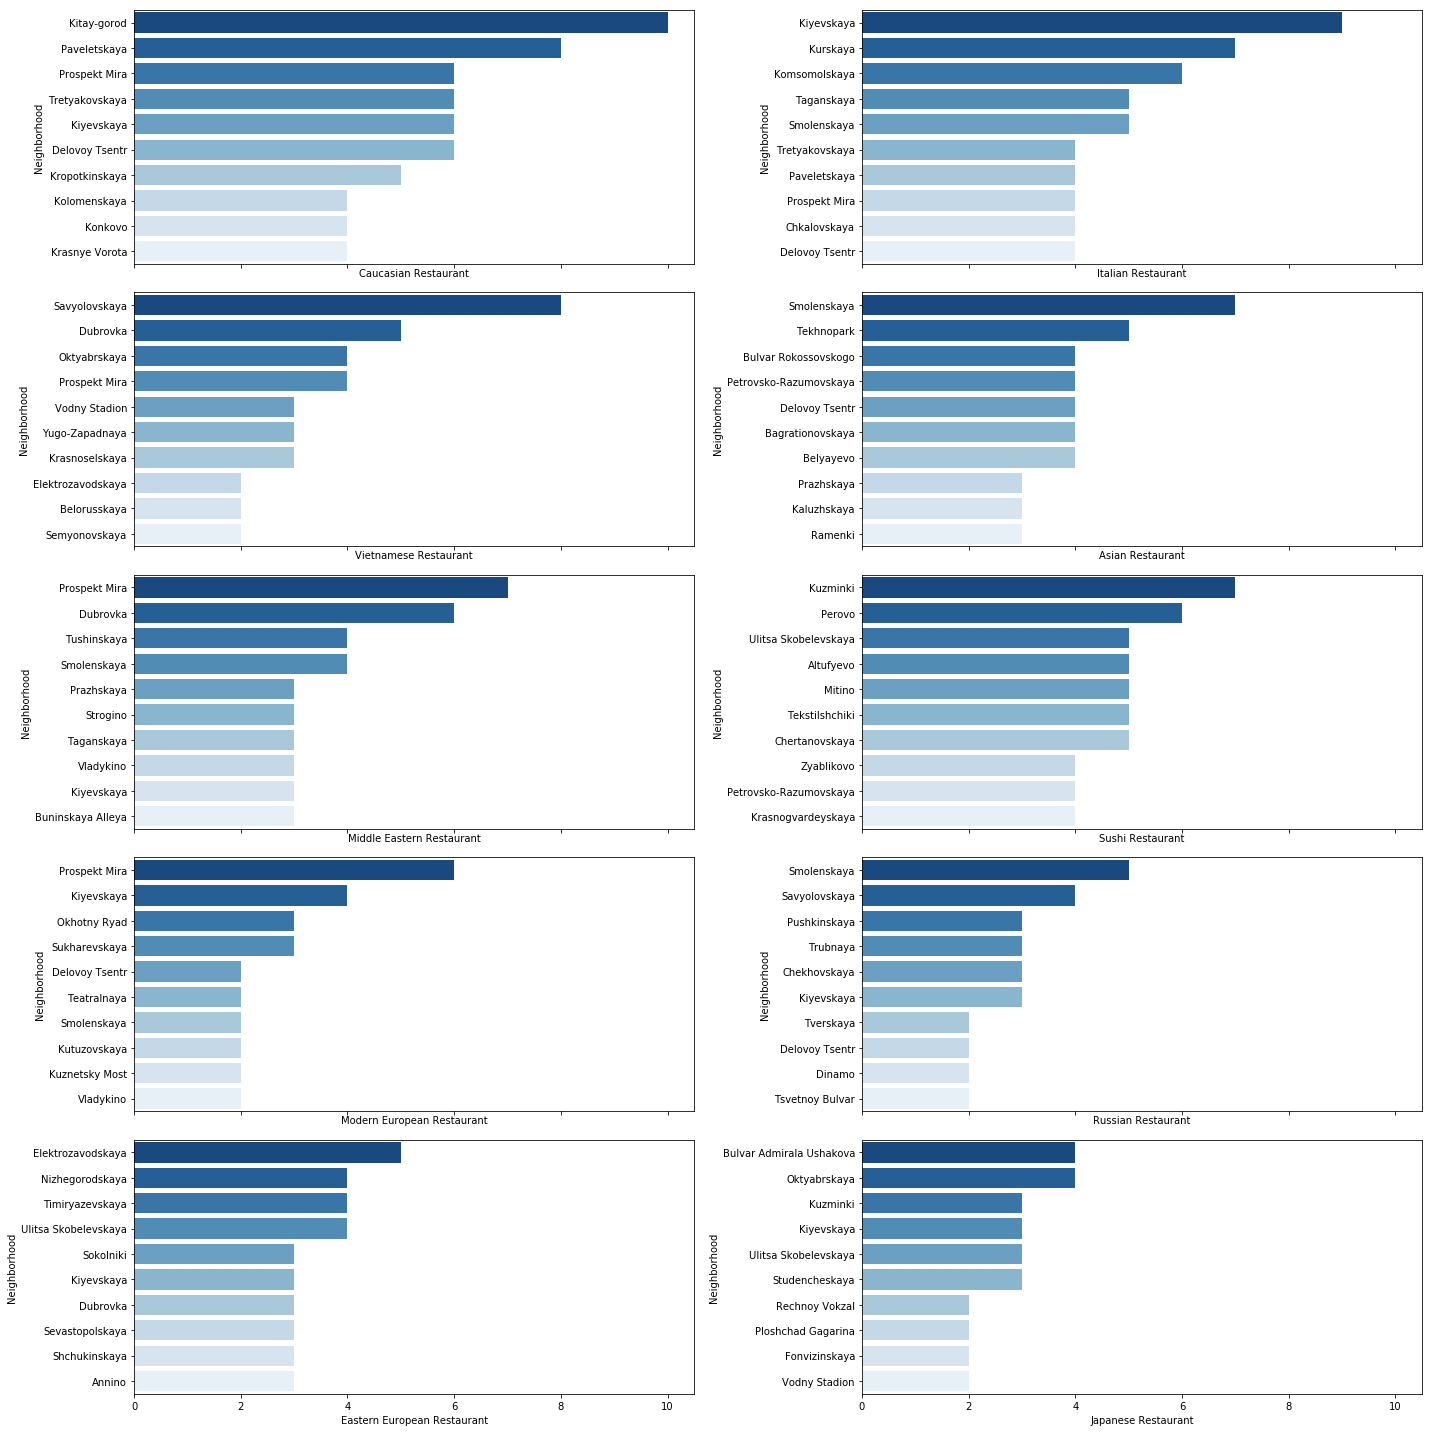

In [50]:
venue_top10_list = venue_top10.index.values.tolist()
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes =plt.subplots(5, 2, figsize=(20,20), sharex=True)
axes = axes.flatten()

for ax, category in zip(axes, venue_top10_list):
    data = venue_counts[[category]].sort_values([category], ascending=False)[0:10]
    pal = sns.color_palette("Blues", len(data))
    sns.barplot(x=category, y=data.index, data=data, ax=ax, palette=np.array(pal[::-1]))

plt.tight_layout()
plt.show();

In [54]:
mos_grouped = mos_onehot.groupby('Neighborhood').mean().reset_index()
mos_grouped.head()

,Neighborhood,American Restaurant,Argentinian Restaurant,Asian Restaurant,Belarusian Restaurant,Belgian Restaurant,Brazilian Restaurant,Bulgarian Restaurant,Cantonese Restaurant,Caucasian Restaurant,...,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tatar Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vietnamese Restaurant
0,Aeroport,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.200000,0.0
1,Akademicheskaya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.571429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0
2,Aleksandrovsky Sad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.2
3,Alekseyevskaya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,...,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,Alma-Atinskaya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,...,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [55]:
mos_grouped.shape

(226, 54)

### KMean Clustering

In [57]:
mos_grouped_clustering = mos_grouped.drop('Neighborhood', 1)

In [58]:
from sklearn.cluster import KMeans # import k-means from clustering stage
from collections import Counter # count occurrences 
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(init="k-means++", n_clusters=kclusters, n_init=50).fit(mos_grouped_clustering)

print(Counter(kmeans.labels_))

Counter({0: 66, 3: 60, 2: 51, 1: 49})


In [59]:
# add clustering labels
try:
    mos_grouped.drop('Cluster Labels', axis=1)
except:
    mos_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

mos_grouped.head()    

,Cluster Labels,Neighborhood,American Restaurant,Argentinian Restaurant,Asian Restaurant,Belarusian Restaurant,Belgian Restaurant,Brazilian Restaurant,Bulgarian Restaurant,Cantonese Restaurant,...,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tatar Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vietnamese Restaurant
0,0,Aeroport,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.200000,0.0
1,1,Akademicheskaya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.571429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0
2,0,Aleksandrovsky Sad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.2
3,3,Alekseyevskaya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,2,Alma-Atinskaya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [60]:
mos_grouped.head(20) 

,Cluster Labels,Neighborhood,American Restaurant,Argentinian Restaurant,Asian Restaurant,Belarusian Restaurant,Belgian Restaurant,Brazilian Restaurant,Bulgarian Restaurant,Cantonese Restaurant,...,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tatar Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vietnamese Restaurant
0,0,Aeroport,0.000000,0.0,0.200000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.200000,0.200000,0.000000
1,1,Akademicheskaya,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.571429,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.142857,0.000000
2,0,Aleksandrovsky Sad,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.100000,0.200000
3,3,Alekseyevskaya,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.090909,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,2,Alma-Atinskaya,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.333333,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
5,1,Altufyevo,0.000000,0.0,0.076923,0.0,0.0,0.0,0.0,0.000000,...,0.384615,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
6,1,Andronovka,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,3,Annino,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.200000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
8,2,Arbatskaya,0.050000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.050000,0.0,0.0,0.0,0.0,0.000000,0.100000,0.000000,0.050000,0.050000
9,0,Aviamotornaya,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.125000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [61]:
kmeans.labels_

array([0, 1, 0, 3, 2, 1, 1, 3, 2, 0, 0, 0, 3, 2, 0, 2, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 3, 0, 1, 3, 3, 2, 0, 0, 3, 1, 2, 0, 2, 2, 2, 2, 1, 0,
       3, 3, 2, 1, 1, 0, 1, 0, 3, 3, 1, 0, 1, 0, 3, 2, 0, 2, 0, 2, 2, 0,
       0, 3, 1, 0, 3, 2, 3, 2, 0, 0, 1, 0, 2, 1, 2, 2, 0, 3, 2, 3, 3, 2,
       3, 2, 2, 0, 0, 2, 0, 1, 2, 0, 3, 1, 0, 0, 3, 3, 0, 1, 3, 1, 3, 1,
       2, 1, 2, 3, 0, 0, 0, 0, 0, 2, 1, 3, 0, 0, 0, 3, 2, 1, 1, 1, 3, 2,
       1, 3, 2, 3, 0, 0, 3, 3, 3, 0, 3, 2, 1, 0, 3, 0, 0, 1, 3, 3, 3, 1,
       2, 0, 3, 2, 0, 2, 3, 0, 2, 1, 1, 3, 3, 3, 3, 0, 0, 3, 2, 2, 2, 0,
       1, 0, 2, 2, 0, 0, 3, 1, 2, 1, 2, 3, 0, 0, 0, 3, 2, 3, 0, 1, 2, 2,
       3, 1, 1, 1, 1, 3, 1, 1, 0, 3, 3, 0, 3, 2, 2, 1, 2, 3, 2, 3, 0, 3,
       1, 3, 3, 1, 3, 1], dtype=int32)

In [62]:
mos_grouped = mos_grouped.rename(columns={'Neighborhood': 'MetroStation'})
final_cluster_merged = final_metro_restaurant_list_df.join(mos_grouped.set_index('MetroStation'), on='MetroStation')
final_cluster_merged = final_cluster_merged.fillna(4)
final_cluster_merged['Cluster Labels'] = final_cluster_merged['Cluster Labels'].astype(int)
final_cluster_merged.head()

,MetroStation,Latitude,Longitude,ListOfVenues,CountOfVenues,Cluster Labels,American Restaurant,Argentinian Restaurant,Asian Restaurant,Belarusian Restaurant,...,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tatar Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vietnamese Restaurant
57,Smolenskaya,55.7474,37.5823,"Russian Restaurant, Italian Restaurant, Asian ...",16,0,0.043478,0.0,0.152174,0.0,...,0.043478,0.0,0.0,0.0,0.000000,0.000000,0.086957,0.000000,0.0,0.000000
78,Smolenskaya,55.7488,37.5825,"Russian Restaurant, Italian Restaurant, Asian ...",16,0,0.043478,0.0,0.152174,0.0,...,0.043478,0.0,0.0,0.0,0.000000,0.000000,0.086957,0.000000,0.0,0.000000
241,Avtozavodskaya,55.7063,37.6631,"Czech Restaurant, Udon Restaurant, Middle East...",15,0,0.000000,0.0,0.076923,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.038462,0.000000,0.038462,0.0,0.076923
36,Avtozavodskaya,55.7074,37.6576,"Czech Restaurant, Udon Restaurant, Middle East...",15,0,0.000000,0.0,0.076923,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.038462,0.000000,0.038462,0.0,0.076923
0,Bulvar Rokossovskogo,55.8148,37.7342,"Chinese Restaurant, Vietnamese Restaurant, Asi...",14,3,0.000000,0.0,0.142857,0.0,...,0.071429,0.0,0.0,0.0,0.071429,0.000000,0.035714,0.000000,0.0,0.071429


In [63]:
final_cluster_merged.shape

(261, 59)

In [64]:
final_cluster_merged_clean = final_cluster_merged.loc[:,'MetroStation':'Cluster Labels'].sort_values('MetroStation', ascending=True)

final_cluster_merged_clean

,MetroStation,Latitude,Longitude,ListOfVenues,CountOfVenues,Cluster Labels
28,Aeroport,55.800300,37.532900,"Udon Restaurant, Italian Restaurant, Ukrainian...",5,0
108,Akademicheskaya,55.687700,37.573300,"Sushi Restaurant, Kebab Restaurant, Chinese Re...",4,1
80,Aleksandrovsky Sad,55.752500,37.608500,"Dumpling Restaurant, Vietnamese Restaurant, Uk...",7,0
98,Alekseyevskaya,55.808800,37.639000,"Caucasian Restaurant, Japanese Restaurant, Sus...",10,3
45,Alma-Atinskaya,55.632600,37.766000,"Middle Eastern Restaurant, Sushi Restaurant, C...",3,2
159,Altufyevo,55.898000,37.587000,"Asian Restaurant, Sushi Restaurant, Halal Rest...",7,1
236,Andronovka,55.741100,37.734400,Sushi Restaurant,1,1
182,Annino,55.582800,37.596600,"Eastern European Restaurant, Middle Eastern Re...",3,3
58,Arbatskaya,55.752200,37.606100,"Dumpling Restaurant, Ukrainian Restaurant, Cau...",13,2
79,Arbatskaya,55.751800,37.600700,"Dumpling Restaurant, Ukrainian Restaurant, Cau...",13,2


In [65]:
final_cluster_merged_clean.shape

(261, 6)

In [66]:
import matplotlib.cm as cm # Matplotlib and associated plotting modules
import matplotlib.colors as colors # Matplotlib and associated plotting modules

In [67]:
new_color_moscow_metro_df = final_cluster_merged_clean
# create map of Moscow using latitude and longitude values
map_color_moscow = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to map ListOfVenues 	CountOfVenues
for lat, lng, metro, vens, num, cluster in zip(new_color_moscow_metro_df['Latitude'], new_color_moscow_metro_df['Longitude'], new_color_moscow_metro_df['MetroStation'], new_color_moscow_metro_df['ListOfVenues'], new_color_moscow_metro_df['CountOfVenues'], new_color_moscow_metro_df['Cluster Labels']):
    label = '{}, {}, {}, Cluster: {}'.format(metro, num, vens, cluster) # .encode('cp1251')  a.encode('utf-8')
    label = folium.Popup(label, parse_html=True )
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],#'blue',
        fill=True,
        fill_color=rainbow[cluster-1],#'#3186cc',
        fill_opacity=0.7,
        parse_html=True).add_to(map_color_moscow)  
    
map_color_moscow

In [70]:
new_color_moscow_metro_df = final_cluster_merged_clean
# create map of Moscow using latitude and longitude values
map_color_moscow = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
###colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = ['blue','green','yellow','magenta','white']

# add markers to map ListOfVenues 	CountOfVenues
for lat, lng, metro, vens, num, cluster in zip(new_color_moscow_metro_df['Latitude'], new_color_moscow_metro_df['Longitude'], new_color_moscow_metro_df['MetroStation'], new_color_moscow_metro_df['ListOfVenues'], new_color_moscow_metro_df['CountOfVenues'], new_color_moscow_metro_df['Cluster Labels']):
    label = '{}, {}, {}, Cluster: {}'.format(metro, num, vens, cluster) # .encode('cp1251')  a.encode('utf-8')
    label = folium.Popup(label, parse_html=True )
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster],#'blue',
        fill=True,
        fill_color=rainbow[cluster],#'#3186cc',
        fill_opacity=0.7,
        parse_html=True).add_to(map_color_moscow)  
    
map_color_moscow